In [61]:
import argparse
import Stocks
import dateutil.relativedelta
from datetime import date
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy.stats import norm

In [62]:
parent_directory = os.path.dirname(os.getcwd())
yaml_file = os.path.join(parent_directory, 'params.yaml')
print(yaml_file)
parser = argparse.ArgumentParser()
parser.add_argument("--params", metavar='', type=str, default="./Example_Portfolio.yaml")
args, _ = parser.parse_known_args()

# Declare stocks class
stocks = Stocks.stocks(args)

# Read params from .yaml file into Stocks class
stocks.read_params()

c:\Users\thean\OneDrive\Documents\Other Projects\Stock Portfolio\params.yaml


[*********************100%***********************]  14 of 14 completed


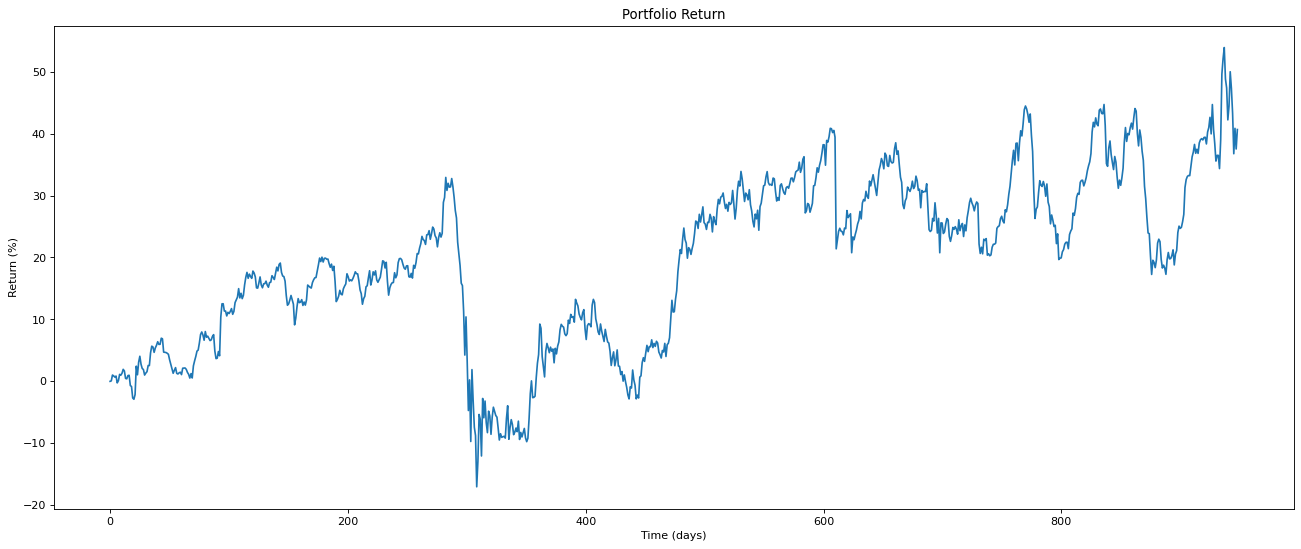

In [63]:
# Calculate portfolio returns 
portfolio_returns = stocks.get_portfolio_returns("max", "1d")

plt.figure(figsize=(20, 8), dpi=80)
plt.plot(np.linspace(0, portfolio_returns.shape[0], portfolio_returns.shape[0]), portfolio_returns*100)
plt.title("Portfolio Return")
plt.xlabel("Time (days)")
plt.ylabel("Return (%)")
plt.show()

[*********************100%***********************]  14 of 14 completed
[*********************100%***********************]  14 of 14 completed


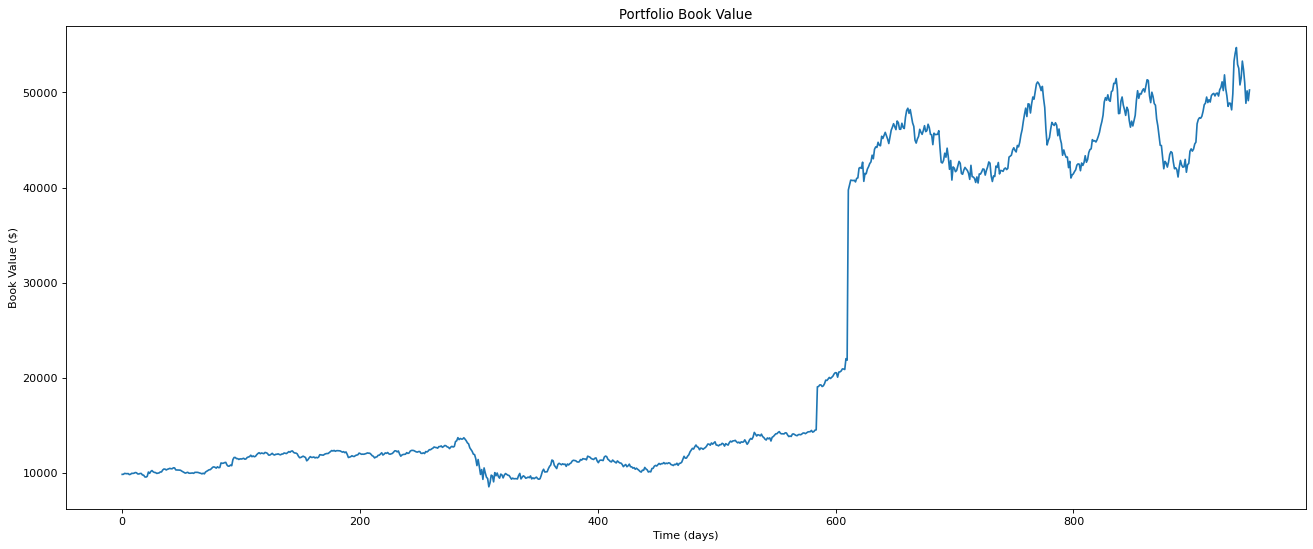

In [64]:
# Calculate timeseries value of portfolio
stocks.get_portfolio_value_timeseries("max", "1d")
portfolio_value = stocks.get_portfolio_value_timeseries("max", "1d")

plt.figure(figsize=(20, 8), dpi=80)
plt.plot(np.linspace(0, portfolio_value.shape[0], portfolio_value.shape[0]), portfolio_value)
plt.title("Portfolio Book Value")
plt.xlabel("Time (days)")
plt.ylabel("Book Value ($)")
plt.show()

[*********************100%***********************]  14 of 14 completed


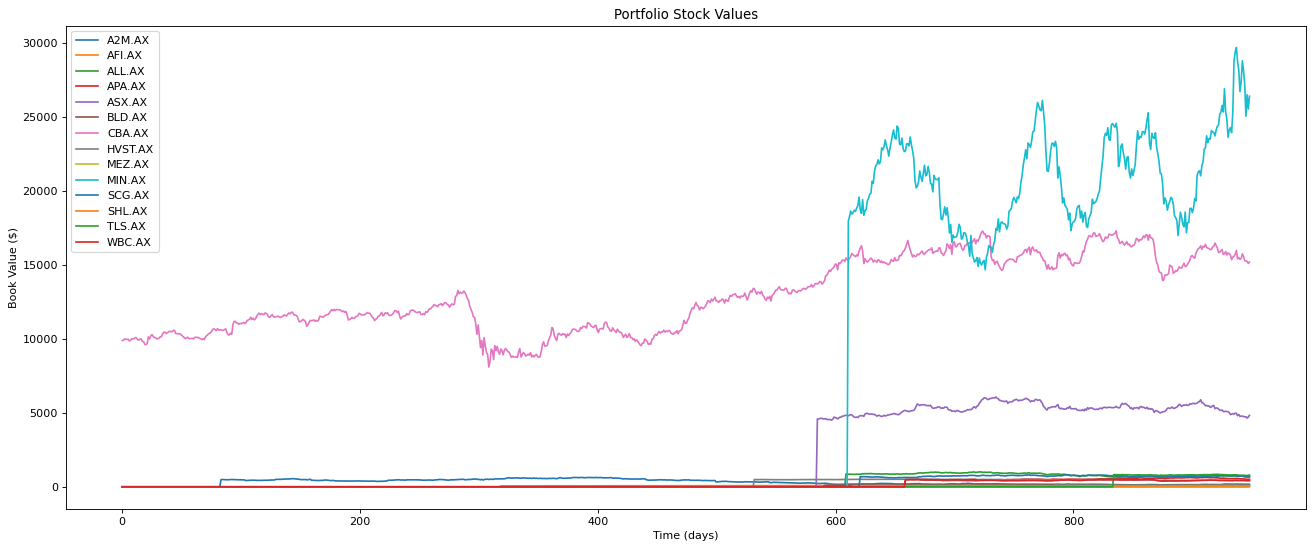

In [65]:

# Calculate timeseries values of stocks in portfolio
portfolio_returns = stocks.get_portfolio_stock_values_timeseries("max", "1d")

plt.figure(figsize=(20, 8), dpi=80)
plt.title("Portfolio Stock Values")
plt.xlabel("Time (days)")
plt.ylabel("Book Value ($)")
for ticker, values in portfolio_returns.iteritems():
        plt.plot(np.linspace(0, values.shape[0], values.shape[0]), values, label=ticker)

plt.legend()
plt.show()


In [66]:
# Calculate the 99% Value-at-Risk measure over 10 days assuming normal distribution

n = 0.95
days = 1

# Get portfolio prices covariance matrix
prices = stocks.get_stock_data(stocks.tickers_current, period="3mo", interval="1d")["Adj Close"]
covar_matrix = prices.cov()

# Compute portfolio variance
weights = stocks.get_portfolio_weights()
variance = (weights.transpose() @ covar_matrix @ weights)**0.5
VaR = norm.ppf(n)*variance**2*days**2
print("\n\n{:2.2%} VaR is {:.6}".format(n, VaR))
print("In other words:\nThere is a {:2.2%} chance that you will loose more than ${:.4} in the next {} day(s)".format(1-n, VaR, days))

[*********************100%***********************]  14 of 14 completed
[*********************100%***********************]  14 of 14 completed


95.00% VaR is 40.2734
In other words:
There is a 5.00% chance that you will loose more than $40.27 in the next 1 day(s)
